In [90]:
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
%matplotlib inline
plt.rc('figure', figsize=(20.0, 10.0))

In [91]:
hashrate = read_csv("bitcoin_hashrate.csv", parse_dates=True, index_col="Date")
hashrate.columns = ["hashrate"]
price = read_csv("bitcoin_price.csv", parse_dates=True, index_col="Date")
price.columns = ["price"]
difficulty = read_csv("bitcoin_difficulty.csv", parse_dates=True, index_col="Date")
difficulty.columns = ["difficulty"]

data = pd.concat([hashrate, price, difficulty], axis=1)

In [92]:
data = data['2011-01-01':]

In [93]:
def rewardPerBlock(date):
    if date in pd.date_range('2011-01-01', '2012-11-28'):
        return 50
    if date in pd.date_range('2012-11-28', '2016-07-09'):
        return 25
    return 12.5

data["reward"] = data.index.map(rewardPerBlock)

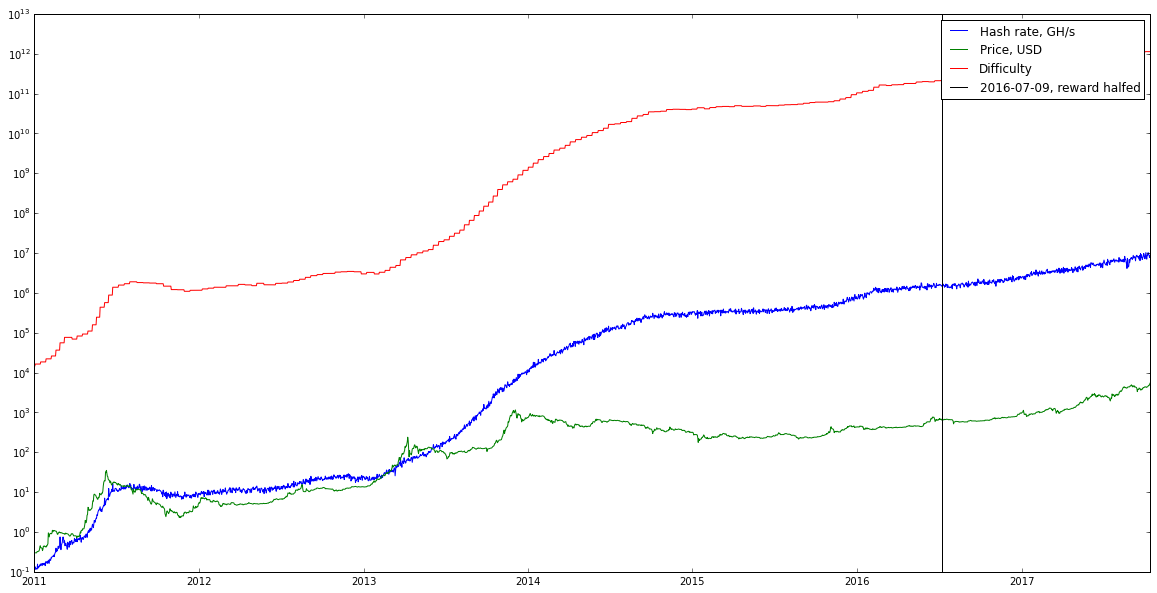

In [94]:
ax = plt.axes()
ax.set_yscale("log")
plt.plot_date(data.index, data["hashrate"], '-', label="Hash rate, GH/s")
plt.plot_date(data.index, data["price"], '-', label="Price, USD")
plt.plot_date(data.index, data["difficulty"], '-', label="Difficulty")
plt.axvline(x=pd.to_datetime('2016-07-09'), color='0', label="2016-07-09, reward halfed")
plt.legend()

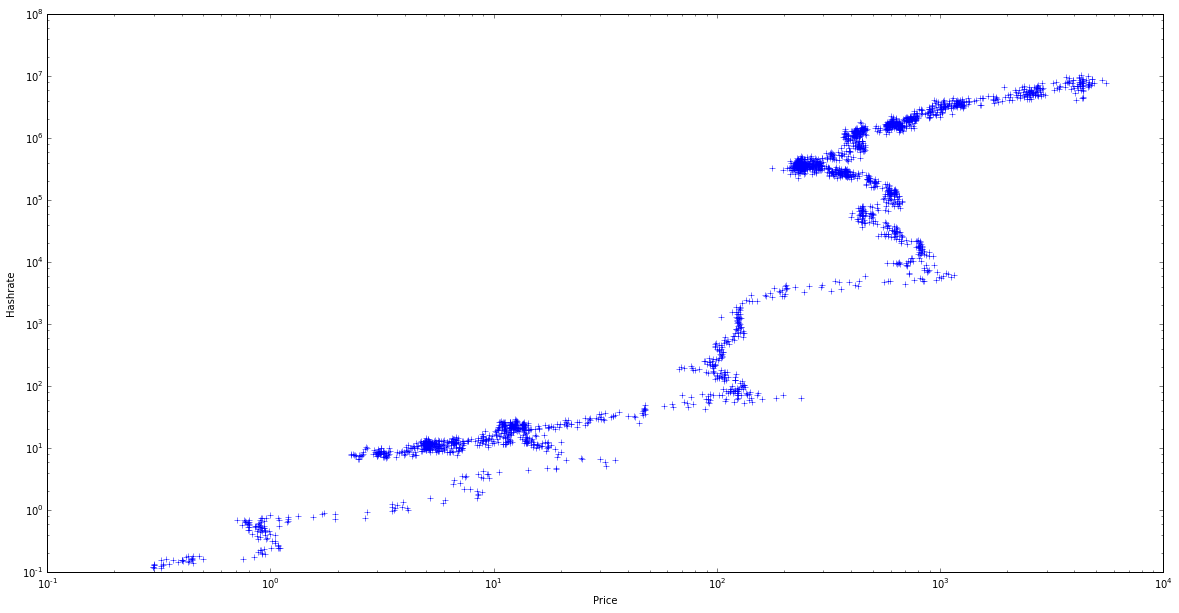

In [95]:
ax = plt.axes()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Price")
ax.set_ylabel("Hashrate")
plt.plot(data["price"], data["hashrate"], '+')

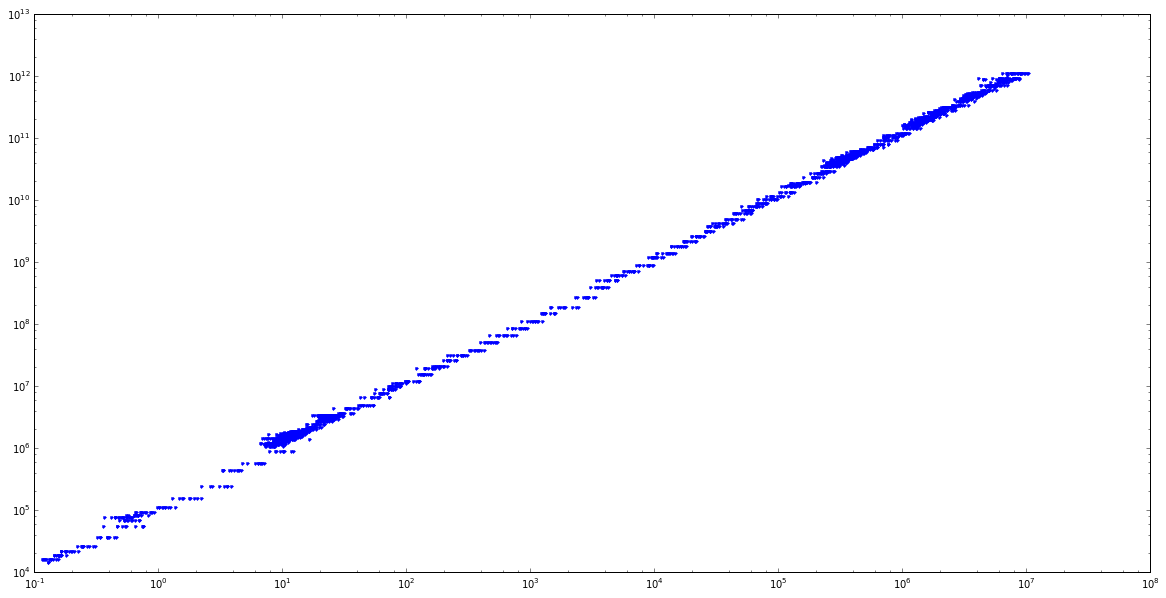

In [96]:
ax = plt.axes()
ax.set_yscale("log")
ax.set_xscale("log")
plt.plot(data["hashrate"], data["difficulty"], '.')

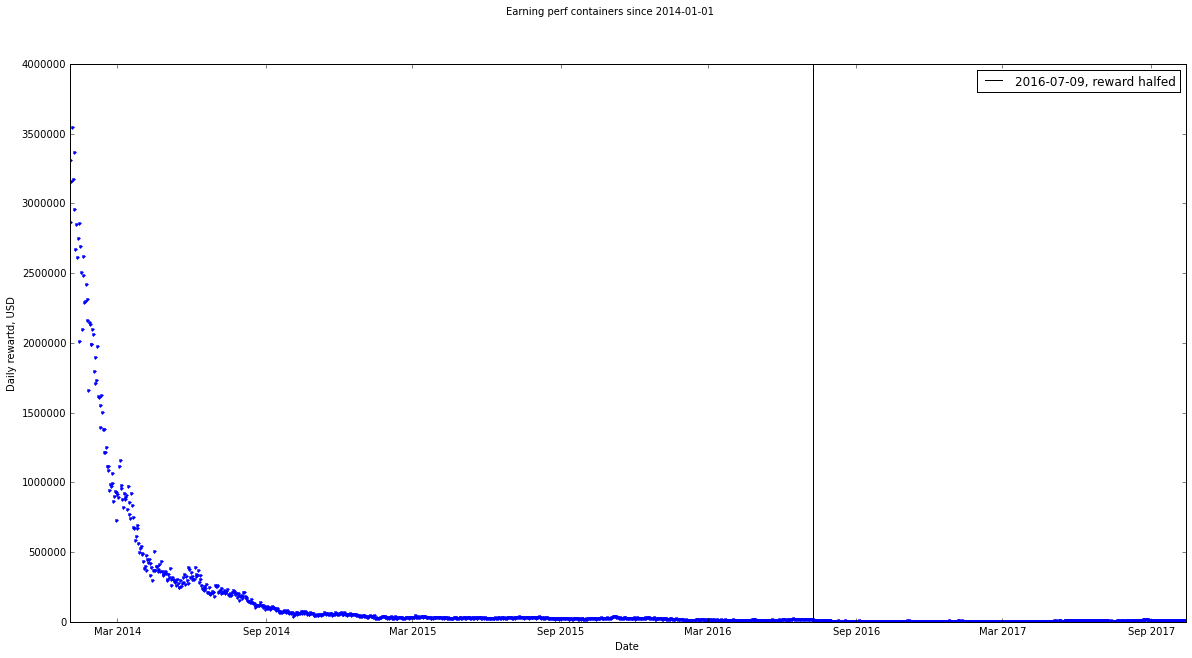

In [99]:
def plot_rewards(data_, start_date, power_ph):
    data = data_[start_date:]
    reward_per_gigahash_per_block = data["price"] * data["reward"] / (data['hashrate'] * 60 * 10)
    reward_per_container = reward_per_gigahash_per_block * power_ph * 1000 * 1000 # bitfury 7.5 PH/s
    blocks_per_day = 144
    ax = plt.axes()
    ax.set_ylabel("Daily rewartd, USD")
    ax.set_xlabel("Date")
    plt.plot(data.index, reward_per_container * blocks_per_day, '.')
    if start_date <'2012-11-28':
        plt.axvline(x=pd.to_datetime('2012-11-28'), color='0', label="2012-11-28, reward halfed")
    if start_date <'2016-07-09':
        plt.axvline(x=pd.to_datetime('2016-07-09'), color='0', label="2016-07-09, reward halfed")
    plt.legend()
    plt.suptitle("Earning perf containers since " + start_date)
    
plot_rewards(data, '2014-01-01', 7.5)

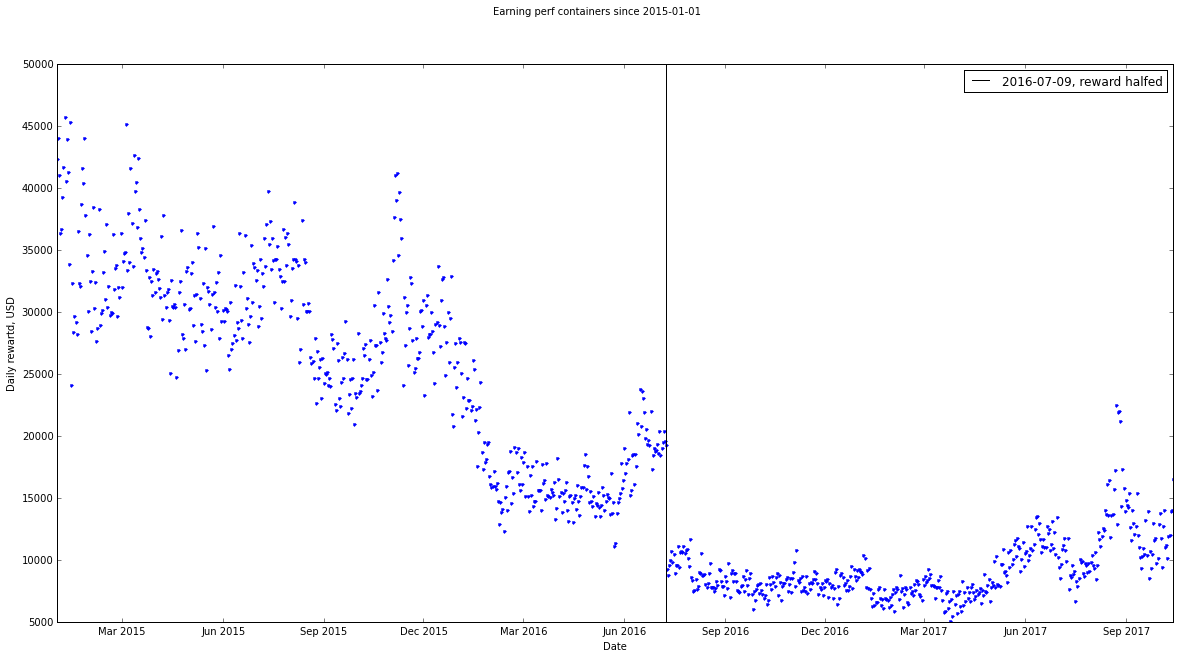

In [101]:
plot_rewards(data, '2015-01-01', 7.5)